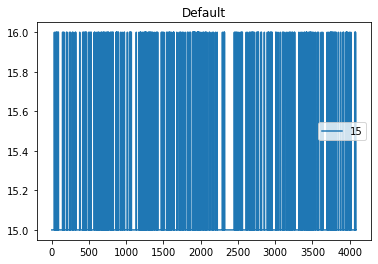

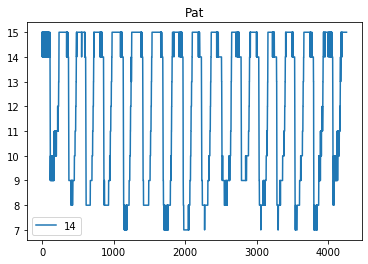

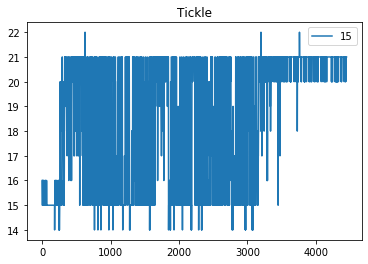

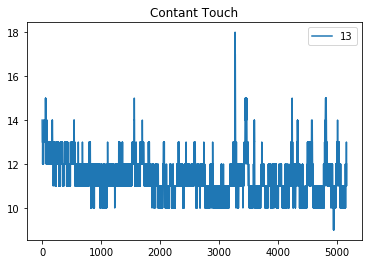

X.shape (17962, 1)
y.shape (17962,)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


if __name__ == '__main__':
    # assume you saved your recordings into a "data" folder
    default = pd.read_csv("data/default.csv")
    pat = pd.read_csv('data/pat.csv')
    tickle = pd.read_csv('data/tickle.csv')
    contantTouch = pd.read_csv('data/touch_3fingers.csv')
  

    default.plot(title='Default')
    pat.plot(title='Pat')
    tickle.plot(title='Tickle')
    contantTouch.plot(title='Contant Touch')
    plt.show()

    # X is the array of features to train the model on
    # y is the array of labels
    X = np.vstack([
        default.to_numpy(),
        pat.to_numpy(),
        tickle.to_numpy(),
        contantTouch.to_numpy()
    ])

    y = np.concatenate([
        0 * np.ones(len(default)),
        1 * np.ones(len(pat)),
        2 * np.ones(len(tickle)),
        3 * np.ones(len(contantTouch))
    ])

    print("X.shape", X.shape)
    print("y.shape", y.shape)
    
    

In [63]:
from embedded_window import Window

SAMPLING_RATE = 200
# this is in milliseconds
WINDOW_DURATION = 500

window = Window(length=SAMPLING_RATE * WINDOW_DURATION // 1000, shift=WINDOW_DURATION // 20)

# X_windows holds the input arranged in windows
# features holds the extracted features for each window (min/max/mean/std...)
# y_windows holds the most frequent label inside each window 
X_windows, features, y_windows = window.fit_transform(X, y)

print('X_windows.shape', X_windows.shape)
print('features.shape', features.shape)
print('y_windows.shape', y_windows.shape)

X_windows.shape (715, 100, 1)
features.shape (715, 8)
y_windows.shape (715,)


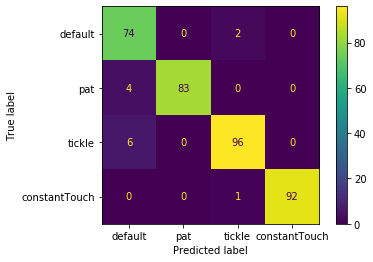

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

# use half data for training, half for testing
X_train, X_test, y_train, y_test = train_test_split(features, y_windows, test_size=0.5, random_state=0)
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=0).fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test, normalize=None, display_labels=['default', 'pat', 'tickle', 'constantTouch'])

In [65]:
with open("Window.h", "w") as file:
    file.write(window.port())

In [66]:
from micromlgen import port

with open("Classifier.h", "w") as file:
    file.write(port(clf, classname="Classifier", classmap={0: "default", 1: "pat", 2: "tickle", 3: "constantTouch"}))